In [35]:
import os
os.chdir('../..')

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import mplhep as hep

from coffea.util import load
from coffea.hist import plot
import numpy as np
import pandas as pd

from pprint import pprint 
hep.style.use(hep.style.ROOT)

In [2]:
filename1 = "/work/dvalsecc/ttHbb/PocketCoffea/output/parton_matching_dR02_v07/output.coffea" 
filename2 = "/work/dvalsecc/ttHbb/PocketCoffea/output/parton_matching_dataset_v1/output.coffea"
output1 = load(filename1)
output2 = load(filename2)
output1.keys()

dict_keys(['sum_genweights', 'cutflow', 'sumw', 'seed_chunk', 'hist_muon_pt', 'hist_muon_eta', 'hist_muon_phi', 'hist_electron_pt', 'hist_electron_eta', 'hist_electron_phi', 'hist_jet_pt', 'hist_jet_eta', 'hist_jet_phi', 'hist_nmuon', 'hist_nelectron', 'hist_nlep', 'hist_njet', 'hist_nbjet', 'hist_nparton', 'hist_parton_pt', 'hist_parton_eta', 'hist_parton_phi', 'hist_parton_pdgId', 'hist_npartonmatched', 'hist_partonmatched_pt', 'hist_partonmatched_eta', 'hist_partonmatched_pdgId', 'hist2d_Njet_Nparton_total', 'hist2d_Njet_Nparton_matched', 'hist2d_Nparton_Nparton_matched', 'columns', 'hist_ptComparison_parton_matching', 'hist_deltaR_parton_matching', 'scale_genweight'])

In [5]:
for cat, v in output1['sumw'].items():
    for sample, i in v.items():
        print(f"{cat}, {sample}, N. MC events {output1['cutflow'][cat][sample]}  N. weighted events: {output1['sumw'][cat][sample] / output1['sum_genweights'][sample]:.2f}")

4j, ttHTobb, N. MC events 777621  N. weighted events: 1358.68
4j, TTToSemiLeptonic, N. MC events 3901337  N. weighted events: 172015.03


In [6]:
for cat, v in output2['sumw'].items():
    for sample, i in v.items():
        print(f"{cat}, {sample}, N. MC events {output2['cutflow'][cat][sample]}  N. weighted events: {output2['sumw'][cat][sample] / output2['sum_genweights'][sample]:.2f}")

4j, ttHTobb, N. MC events 777621  N. weighted events: 1358.68
4j, TTToSemiLeptonic, N. MC events 3901337  N. weighted events: 172015.03


In [7]:
output1["cutflow"]

{'4j': defaultdict_accumulator(int,
                         {'ttHTobb': 777621, 'TTToSemiLeptonic': 3901337}),
 'initial': defaultdict_accumulator(int,
                         {'ttHTobb': 9668000, 'TTToSemiLeptonic': 476408000}),
 'skim': defaultdict_accumulator(int,
                         {'ttHTobb': 1491965, 'TTToSemiLeptonic': 13014817}),
 'presel': defaultdict_accumulator(int,
                         {'ttHTobb': 777621, 'TTToSemiLeptonic': 3901337})}

/work/dvalsecc/miniconda3/envs/coffea3/lib/python3.10/site-packages/hist/basehist.py:110: UserWarning: sample is a protected keyword and cannot be used as axis name
  warnings.warn(disallowed_warning)


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fcc01f59270>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

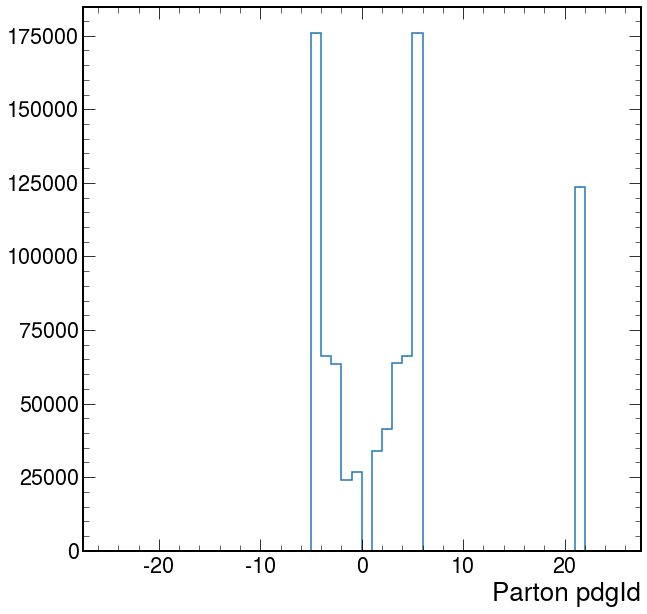

In [12]:
pdgId = output2["hist_parton_pdgId"].to_hist()
hep.histplot(pdgId['TTToSemiLeptonic', '4j','2018',:])

/work/dvalsecc/miniconda3/envs/coffea3/lib/python3.10/site-packages/hist/basehist.py:110: UserWarning: sample is a protected keyword and cannot be used as axis name
  warnings.warn(disallowed_warning)


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fcc01ecb6d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

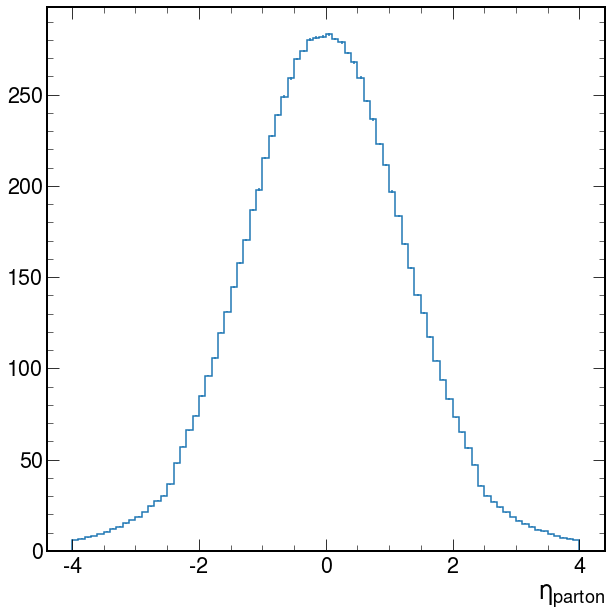

In [17]:
np = output2["hist_parton_eta"].to_hist()
hep.histplot(np['ttHTobb', '4j','2018',:])

/work/dvalsecc/miniconda3/envs/coffea3/lib/python3.10/site-packages/hist/basehist.py:110: UserWarning: sample is a protected keyword and cannot be used as axis name
  warnings.warn(disallowed_warning)


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fe59902db70>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

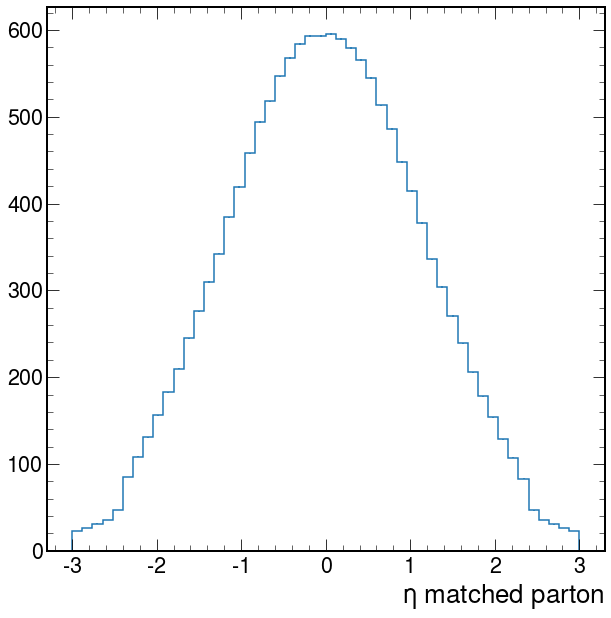

In [163]:
np = output["hist_partonmatched_eta"].to_hist()
hep.histplot(np['ttHTobb', '4j','2018',:])

## DeltaR analysis

In [19]:
output1['seed_chunk'] = None

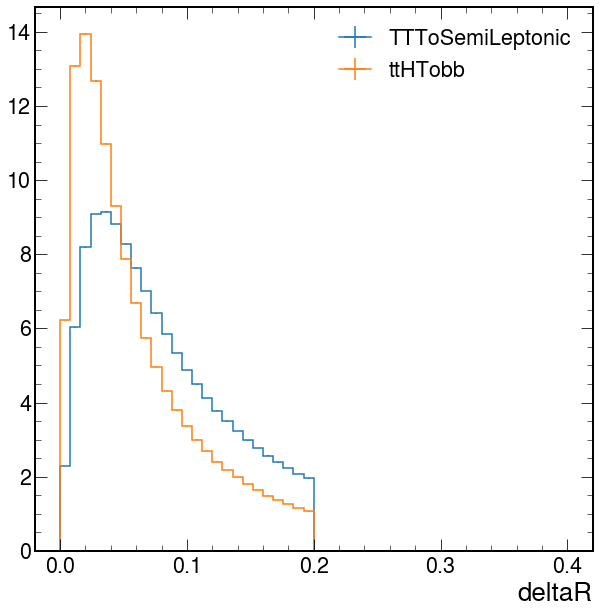

In [26]:
hdR = output1['hist_deltaR_parton_matching'].to_hist()
hep.histplot(hdR['TTToSemiLeptonic', '4j','2018',:], density=True, label="TTToSemiLeptonic")
hep.histplot(hdR['ttHTobb', '4j','2018',:], density=True, label="ttHTobb")
plt.legend()

/work/dvalsecc/miniconda3/envs/coffea3/lib/python3.10/site-packages/hist/basehist.py:110: UserWarning: sample is a protected keyword and cannot be used as axis name
  warnings.warn(disallowed_warning)


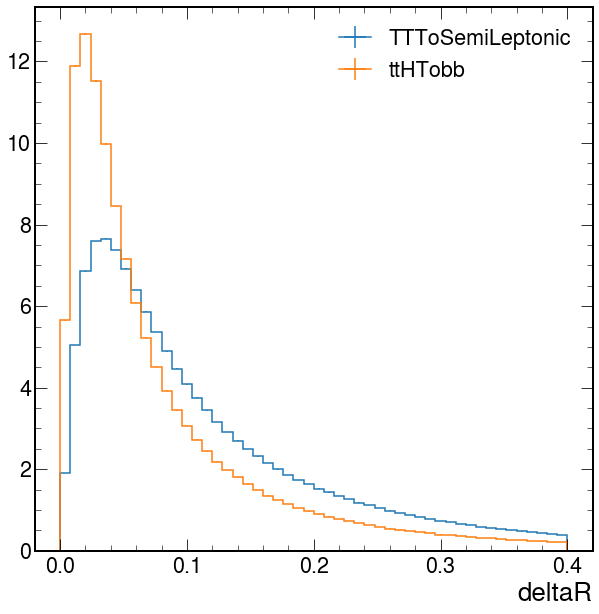

In [29]:
hdR = output2['hist_deltaR_parton_matching'].to_hist()
hep.histplot(hdR['TTToSemiLeptonic', '4j','2018',:], density=True, label="TTToSemiLeptonic")
hep.histplot(hdR['ttHTobb', '4j','2018',:], density=True, label="ttHTobb")
plt.legend()

# Number of jets and matched partons analysis

/work/dvalsecc/miniconda3/envs/coffea3/lib/python3.10/site-packages/hist/basehist.py:110: UserWarning: sample is a protected keyword and cannot be used as axis name
  warnings.warn(disallowed_warning)
/work/dvalsecc/miniconda3/envs/coffea3/lib/python3.10/site-packages/hist/basehist.py:110: UserWarning: sample is a protected keyword and cannot be used as axis name
  warnings.warn(disallowed_warning)


(0.0, 10.0)

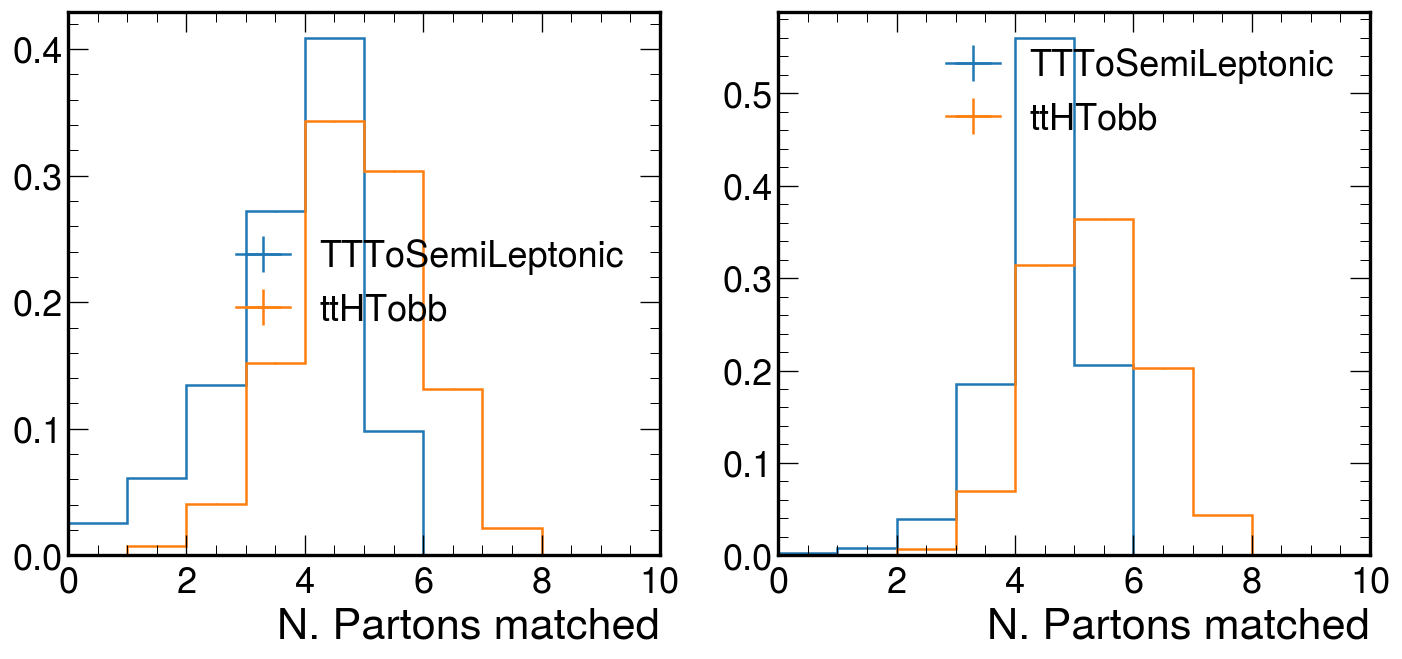

In [36]:
fig,( ax,ay) = plt.subplots(1, 2, figsize=(14, 6), dpi=120)
plt.subplots_adjust(wspace=0.2)

np = output1["hist_npartonmatched"].to_hist()
hep.histplot(np['TTToSemiLeptonic', '4j','2018',:], density=True, label="TTToSemiLeptonic", ax=ax)
hep.histplot(np['ttHTobb', '4j','2018',:], density=True, label="ttHTobb", ax=ax)
ax.legend()
ax.set_xlim(0,10)


np = output2["hist_npartonmatched"].to_hist()
hep.histplot(np['TTToSemiLeptonic', '4j','2018',:], density=True, label="TTToSemiLeptonic", ax=ay)
hep.histplot(np['ttHTobb', '4j','2018',:], density=True, label="ttHTobb", ax=ay)
ay.legend()
ay.set_xlim(0,10)

/work/dvalsecc/miniconda3/envs/coffea3/lib/python3.10/site-packages/hist/basehist.py:110: UserWarning: sample is a protected keyword and cannot be used as axis name
  warnings.warn(disallowed_warning)


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fcc0fbfe0e0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

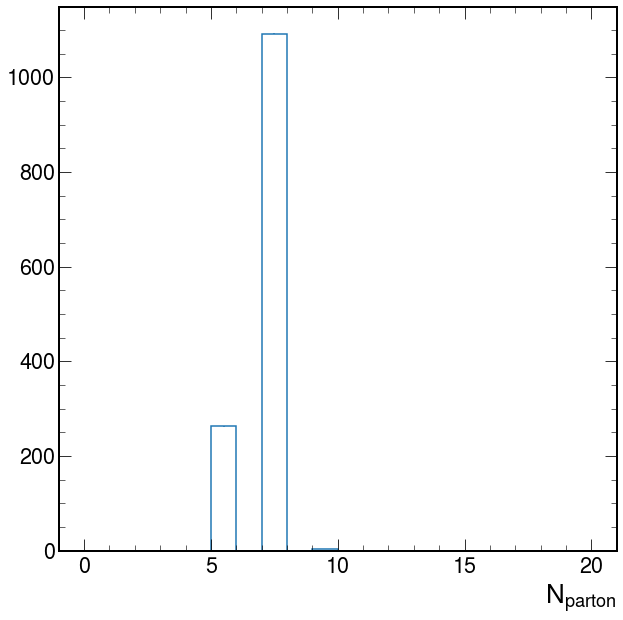

In [43]:
np = output1["hist_nparton"].to_hist()
hep.histplot(np['ttHTobb', '4j','2018',:])
#plt.yscale("log")

Text(0.2, 0.8, 'TTToSemiLeptonic')

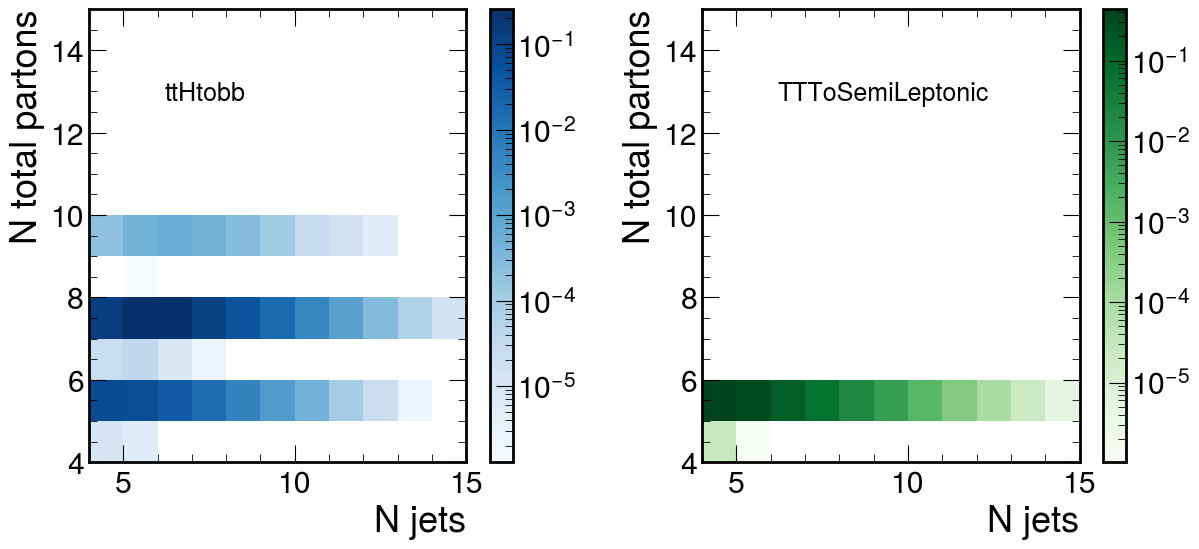

In [6]:
E = output1["hist2d_Njet_Nparton_total"].to_hist()

fig,( ax,ay) = plt.subplots(1, 2, figsize=(14, 6), dpi=100)
plt.subplots_adjust(wspace=0.3)
ax.set_xlabel("N partons matched")
ax.set_xlabel("N total partons")
w, x, y = (E['ttHTobb', '4j','2018', :,:]*(1/output1["scale_genweight"]['ttHTobb'])).to_numpy()
mesh = ax.pcolormesh(x, y, w.T / np.sum(w), cmap="Blues", norm=LogNorm())

ax.set_xlabel("N jets")
ax.set_ylabel("N total partons")
plt.colorbar(mesh,ax=ax)
ax.text(0.2, 0.8, "ttHtobb", transform=ax.transAxes, fontsize=18)

w, x, y = (E['TTToSemiLeptonic', '4j','2018', :,:]*(1/output1["scale_genweight"]['TTToSemiLeptonic'])).to_numpy()
mesh = ay.pcolormesh(x, y, w.T / np.sum(w), cmap="Greens", norm=LogNorm())

ay.set_xlabel("N jets")
ay.set_ylabel("N total partons")
plt.colorbar(mesh,ax=ay)
ay.text(0.2, 0.8, "TTToSemiLeptonic", transform=ay.transAxes, fontsize=18)



Text(0.2, 0.8, 'TTToSemiLeptonic')

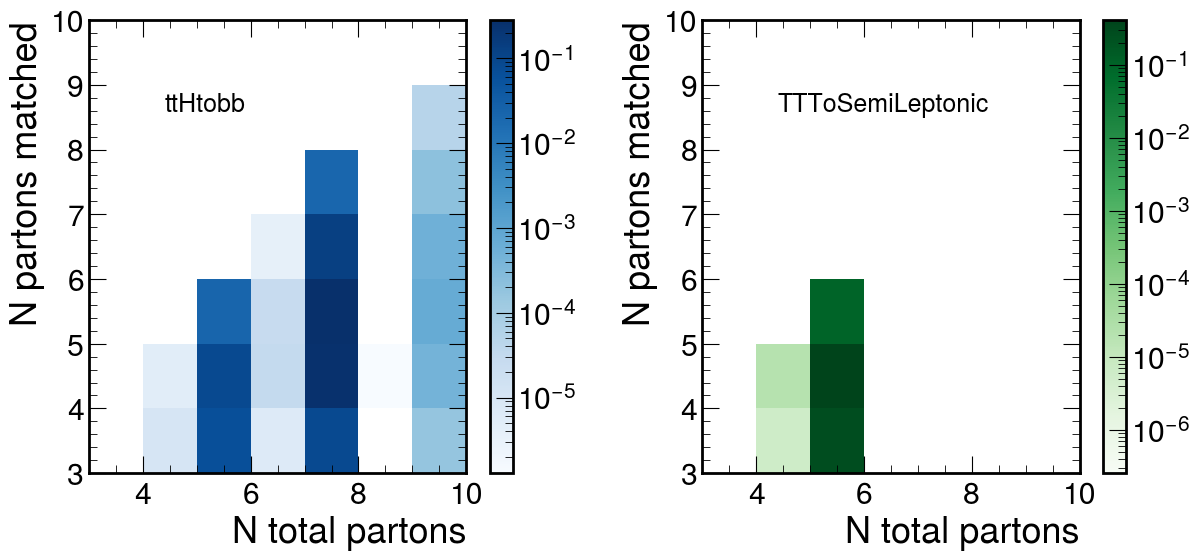

In [14]:
E = output1["hist2d_Nparton_Nparton_matched"].to_hist()

fig,( ax,ay) = plt.subplots(1, 2, figsize=(14, 6), dpi=100)
plt.subplots_adjust(wspace=0.3)
w, x, y = (E['ttHTobb', '4j','2018', :,:]*(1/output1["scale_genweight"]['ttHTobb'])).to_numpy()
mesh = ax.pcolormesh(x, y, w.T / np.sum(w), cmap="Blues", norm=LogNorm())

ax.set_ylabel("N partons matched")
ax.set_xlabel("N total partons")
ax.set_xlim(3.,10.)
ax.set_ylim(3.,10.)
plt.colorbar(mesh,ax=ax)
ax.text(0.2, 0.8, "ttHtobb", transform=ax.transAxes, fontsize=18)

w, x, y = (E['TTToSemiLeptonic', '4j','2018', :,:]*(1/output1["scale_genweight"]['TTToSemiLeptonic'])).to_numpy()
mesh = ay.pcolormesh(x, y, w.T / np.sum(w), cmap="Greens", norm=LogNorm())

ay.set_ylabel("N partons matched")
ay.set_xlabel("N total partons")
plt.colorbar(mesh,ax=ay)
ay.set_xlim(3.,10.)
ay.set_ylim(3.,10.)
ay.text(0.2, 0.8, "TTToSemiLeptonic", transform=ay.transAxes, fontsize=18)



Text(0.2, 0.8, 'TTToSemiLeptonic')

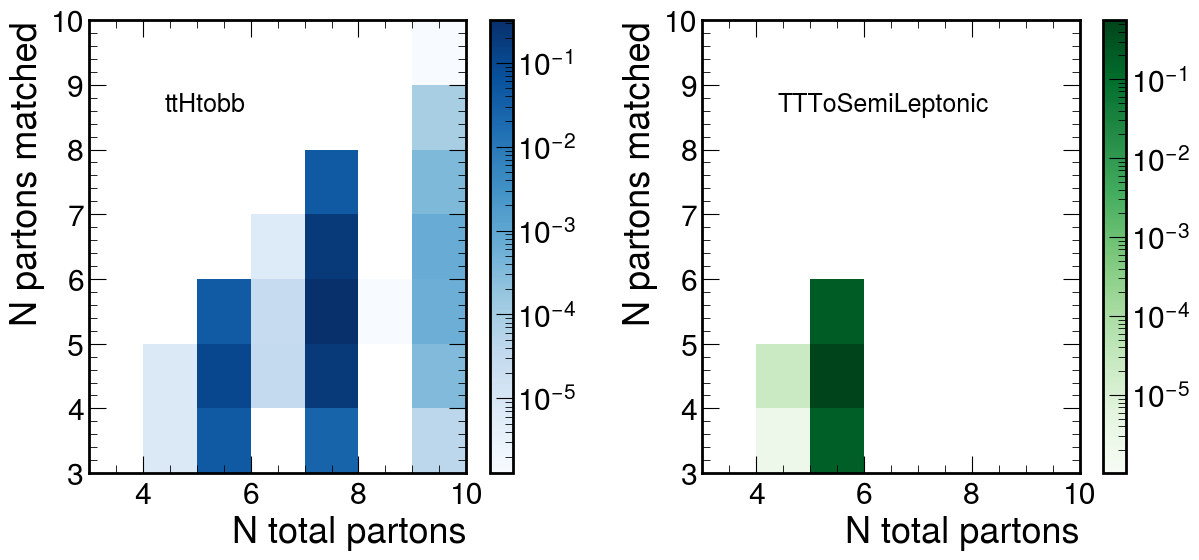

In [15]:
E = output2["hist2d_Nparton_Nparton_matched"].to_hist()

fig,( ax,ay) = plt.subplots(1, 2, figsize=(14, 6), dpi=100)
plt.subplots_adjust(wspace=0.3)
w, x, y = (E['ttHTobb', '4j','2018', :,:]*(1/output2["scale_genweight"]['ttHTobb'])).to_numpy()
mesh = ax.pcolormesh(x, y, w.T / np.sum(w), cmap="Blues", norm=LogNorm())

ax.set_ylabel("N partons matched")
ax.set_xlabel("N total partons")
ax.set_xlim(3.,10.)
ax.set_ylim(3.,10.)
plt.colorbar(mesh,ax=ax)
ax.text(0.2, 0.8, "ttHtobb", transform=ax.transAxes, fontsize=18)

w, x, y = (E['TTToSemiLeptonic', '4j','2018', :,:]*(1/output2["scale_genweight"]['TTToSemiLeptonic'])).to_numpy()
mesh = ay.pcolormesh(x, y, w.T / np.sum(w), cmap="Greens", norm=LogNorm())

ay.set_ylabel("N partons matched")
ay.set_xlabel("N total partons")
plt.colorbar(mesh,ax=ay)
ay.set_xlim(3.,10.)
ay.set_ylim(3.,10.)
ay.text(0.2, 0.8, "TTToSemiLeptonic", transform=ay.transAxes, fontsize=18)



Text(0.2, 0.8, 'TTToSemiLeptonic')

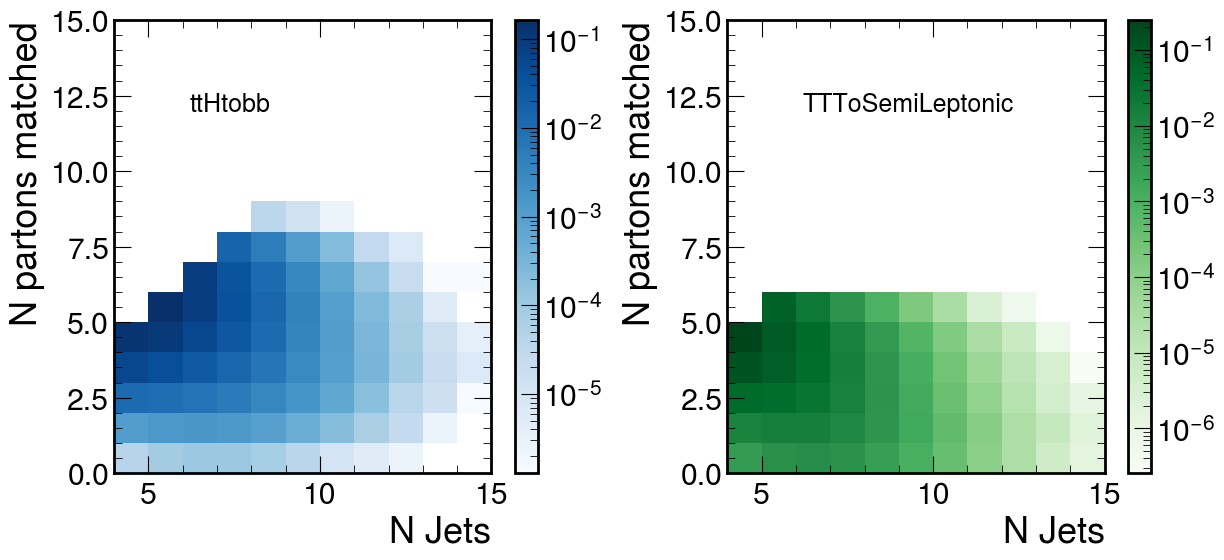

In [16]:
E = output1["hist2d_Njet_Nparton_matched"].to_hist()

fig,( ax,ay) = plt.subplots(1, 2, figsize=(14, 6), dpi=100)
plt.subplots_adjust(wspace=0.3)
w, x, y = (E['ttHTobb', '4j','2018', :,:]*(1/output1["scale_genweight"]['ttHTobb'])).to_numpy()
mesh = ax.pcolormesh(x, y, w.T / np.sum(w), cmap="Blues", norm=LogNorm())

ax.set_ylabel("N partons matched")
ax.set_xlabel("N Jets")
plt.colorbar(mesh,ax=ax)
ax.text(0.2, 0.8, "ttHtobb", transform=ax.transAxes, fontsize=18)

w, x, y = (E['TTToSemiLeptonic', '4j','2018', :,:]*(1/output1["scale_genweight"]['TTToSemiLeptonic'])).to_numpy()
mesh = ay.pcolormesh(x, y, w.T / np.sum(w), cmap="Greens", norm=LogNorm())

ay.set_ylabel("N partons matched")
ay.set_xlabel("N Jets")
plt.colorbar(mesh,ax=ay)
ay.text(0.2, 0.8, "TTToSemiLeptonic", transform=ay.transAxes, fontsize=18)



Text(0.2, 0.8, 'TTToSemiLeptonic')

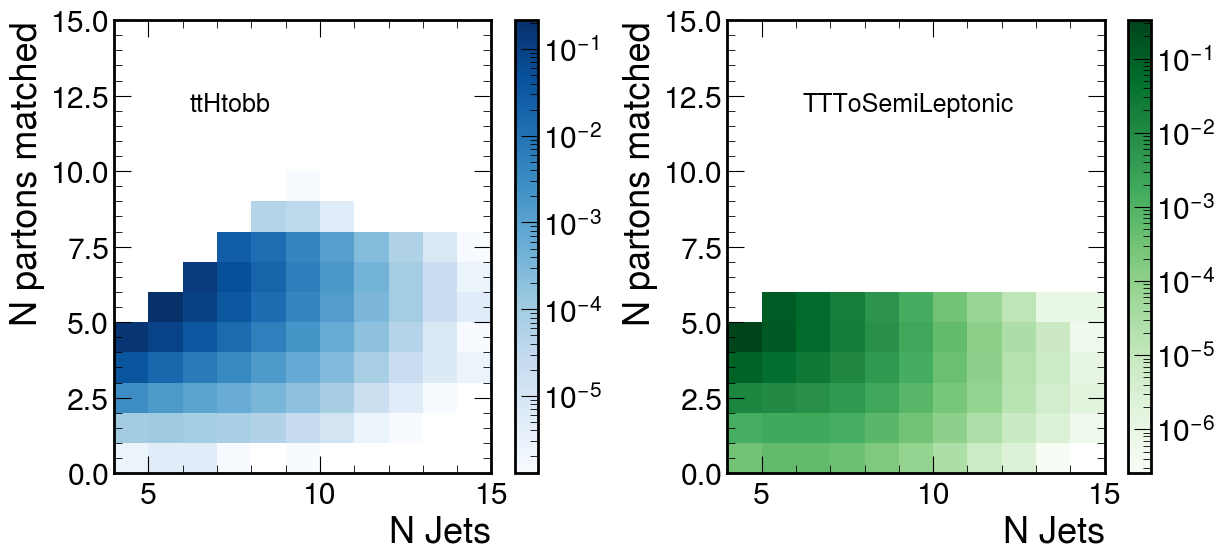

In [17]:
E = output2["hist2d_Njet_Nparton_matched"].to_hist()

fig,( ax,ay) = plt.subplots(1, 2, figsize=(14, 6), dpi=100)
plt.subplots_adjust(wspace=0.3)
w, x, y = (E['ttHTobb', '4j','2018', :,:]*(1/output2["scale_genweight"]['ttHTobb'])).to_numpy()
mesh = ax.pcolormesh(x, y, w.T / np.sum(w), cmap="Blues", norm=LogNorm())

ax.set_ylabel("N partons matched")
ax.set_xlabel("N Jets")
plt.colorbar(mesh,ax=ax)
ax.text(0.2, 0.8, "ttHtobb", transform=ax.transAxes, fontsize=18)

w, x, y = (E['TTToSemiLeptonic', '4j','2018', :,:]*(1/output2["scale_genweight"]['TTToSemiLeptonic'])).to_numpy()
mesh = ay.pcolormesh(x, y, w.T / np.sum(w), cmap="Greens", norm=LogNorm())

ay.set_ylabel("N partons matched")
ay.set_xlabel("N Jets")
plt.colorbar(mesh,ax=ay)
ay.text(0.2, 0.8, "TTToSemiLeptonic", transform=ay.transAxes, fontsize=18)



Text(0.2, 0.8, 'TTToSemiLeptonic')

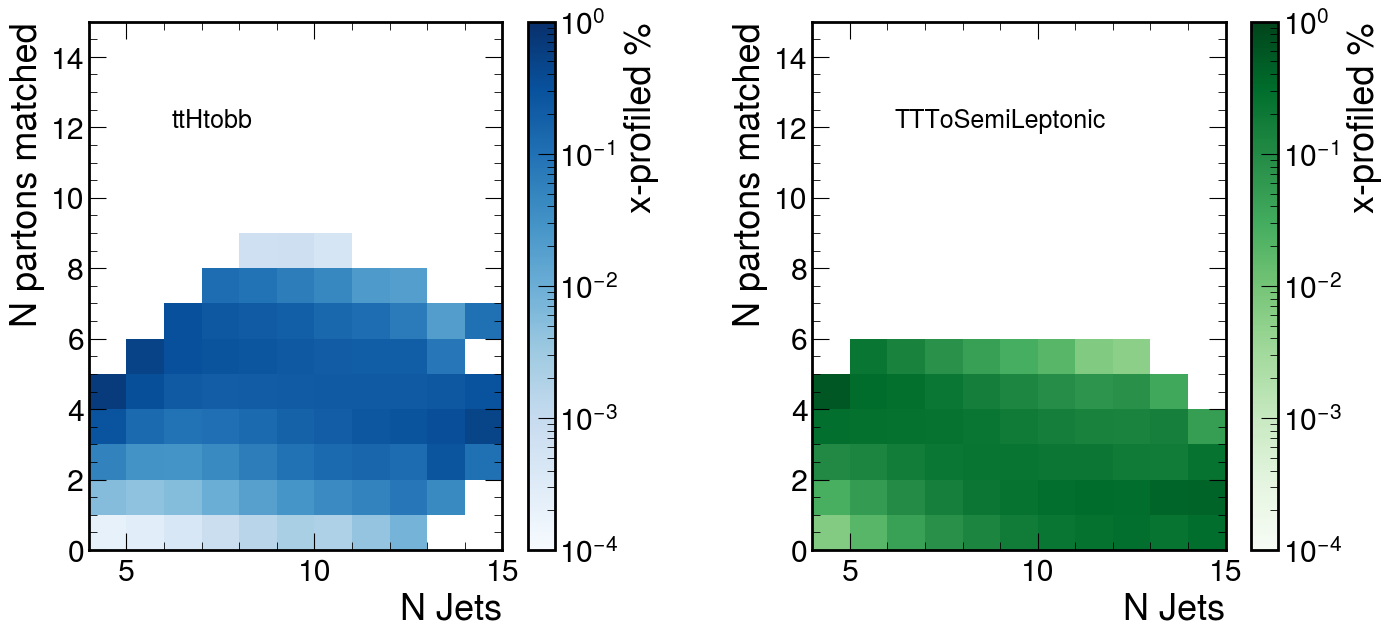

In [18]:
E = output1["hist2d_Njet_Nparton_matched"].to_hist()

fig,( ax,ay) = plt.subplots(1, 2, figsize=(16, 7), dpi=100)
plt.subplots_adjust(wspace=0.4)
w, x, y = (E['ttHTobb', '4j','2018', :,:]*(1/output1["scale_genweight"]['ttHTobb'])).to_numpy()
s = np.expand_dims(np.sum(w, axis=-1), axis=1)
w = w / s

mesh = ax.pcolormesh(x, y, w.T, cmap="Blues", norm=LogNorm(vmin=1e-4, vmax=1))

ax.set_ylabel("N partons matched")
ax.set_xlabel("N Jets")
plt.colorbar(mesh,ax=ax, label="x-profiled %")
ax.text(0.2, 0.8, "ttHtobb", transform=ax.transAxes, fontsize=18)

w, x, y = (E['TTToSemiLeptonic', '4j','2018', :,:]*(1/output1["scale_genweight"]['TTToSemiLeptonic'])).to_numpy()
s = np.expand_dims(np.sum(w, axis=-1), axis=1)
w = w / s
mesh = ay.pcolormesh(x, y, w.T, cmap="Greens", norm=LogNorm(vmin=1e-4, vmax=1))
ay.set_ylabel("N partons matched")
ay.set_xlabel("N Jets")
plt.colorbar(mesh,ax=ay,label="x-profiled %")
ay.text(0.2, 0.8, "TTToSemiLeptonic", transform=ay.transAxes, fontsize=18)



Text(0.2, 0.8, 'TTToSemiLeptonic')

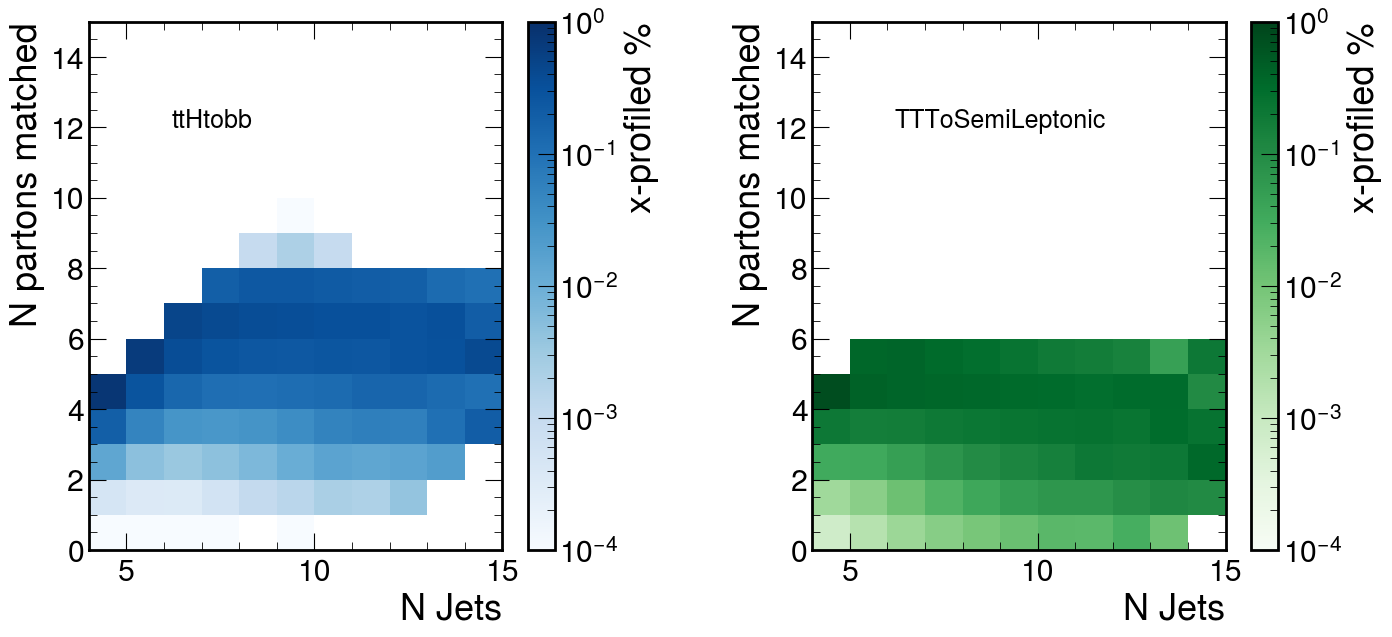

In [19]:
E = output2["hist2d_Njet_Nparton_matched"].to_hist()

fig,( ax,ay) = plt.subplots(1, 2, figsize=(16, 7), dpi=100)
plt.subplots_adjust(wspace=0.4)
w, x, y = (E['ttHTobb', '4j','2018', :,:]*(1/output2["scale_genweight"]['ttHTobb'])).to_numpy()
s = np.expand_dims(np.sum(w, axis=-1), axis=1)
w = w / s

mesh = ax.pcolormesh(x, y, w.T, cmap="Blues", norm=LogNorm(vmin=1e-4, vmax=1))

ax.set_ylabel("N partons matched")
ax.set_xlabel("N Jets")
plt.colorbar(mesh,ax=ax, label="x-profiled %")
ax.text(0.2, 0.8, "ttHtobb", transform=ax.transAxes, fontsize=18)

w, x, y = (E['TTToSemiLeptonic', '4j','2018', :,:]*(1/output2["scale_genweight"]['TTToSemiLeptonic'])).to_numpy()
s = np.expand_dims(np.sum(w, axis=-1), axis=1)
w = w / s
mesh = ay.pcolormesh(x, y, w.T, cmap="Greens", norm=LogNorm(vmin=1e-4, vmax=1))
ay.set_ylabel("N partons matched")
ay.set_xlabel("N Jets")
plt.colorbar(mesh,ax=ay,label="x-profiled %")
ay.text(0.2, 0.8, "TTToSemiLeptonic", transform=ay.transAxes, fontsize=18)



Hist(
  StrCategory(['TTToSemiLeptonic', 'ttHTobb'], growth=True, name='sample', label='Sample'),
  StrCategory(['4j', '5j', '6j', '7j', '8j'], growth=True, name='cat', label='Cat'),
  StrCategory(['2018'], growth=True, name='year', label='Year'),
  Regular(11, 4, 15, name='Nparton', label='N partons'),
  Regular(15, 0, 15, name='Nparton_matched', label='N partons matched'),
  storage=Weight()) # Sum: WeightedSum(value=0.408939, variance=8.44204e-08)


(0.0, 10.0)

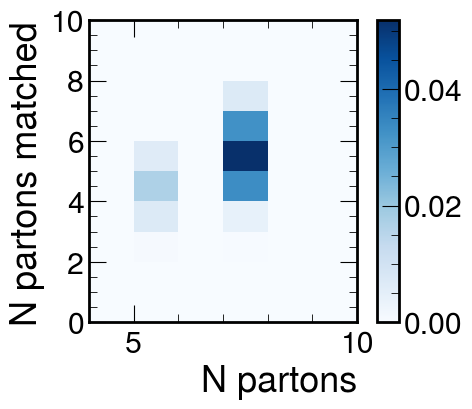

In [36]:
E = output["hist2d_Nparton_Nparton_matched"].to_hist()
print(E)
fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=100)
hep.hist2dplot(E['ttHTobb', '4j','2018', :,:], ax=ax, cmap="Blues")
plt.xlim(4,10)
plt.ylim(0,10)

Hist(
  StrCategory(['TTToSemiLeptonic', 'ttHTobb'], growth=True, name='sample', label='Sample'),
  StrCategory(['4j', '5j', '6j', '7j', '8j'], growth=True, name='cat', label='Cat'),
  StrCategory(['2018'], growth=True, name='year', label='Year'),
  Regular(11, 4, 15, name='Nparton', label='N partons'),
  Regular(15, 0, 15, name='Nparton_matched', label='N partons matched'),
  storage=Weight()) # Sum: WeightedSum(value=0.408939, variance=8.44204e-08)


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fe641dce0e0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fe641def820>, text=[])

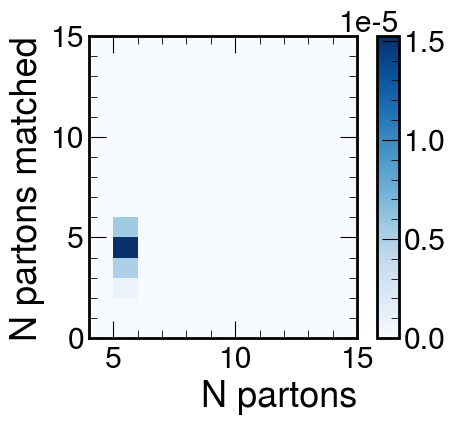

In [37]:
E = output["hist2d_Nparton_Nparton_matched"].to_hist()
print(E)
fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=100)
hep.hist2dplot(E['TTToSemiLeptonic', '4j','2018', :,:], ax=ax, cmap="Blues")

Hist(
  StrCategory(['TTToSemiLeptonic', 'ttHTobb'], growth=True, name='sample', label='Sample'),
  StrCategory(['4j', '5j', '6j', '7j', '8j'], growth=True, name='cat', label='Cat'),
  StrCategory(['2018'], growth=True, name='year', label='Year'),
  Regular(11, 4, 15, name='Njet', label='N jets'),
  Regular(11, 4, 15, name='Nparton', label='N partons'),
  storage=Weight()) # Sum: WeightedSum(value=0.408936, variance=8.44198e-08) (WeightedSum(value=0.408939, variance=8.44204e-08) with flow)


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fe641ec90c0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fe641cef730>, text=[])

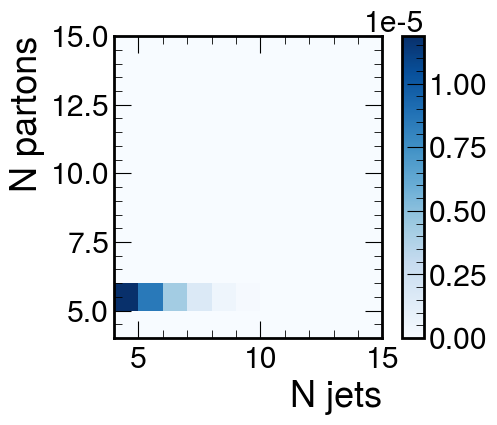

In [38]:
E = output["hist2d_Njet_Nparton_total"].to_hist()
print(E)
fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=100)
hep.hist2dplot(E['TTToSemiLeptonic', '4j','2018', :,:], ax=ax, cmap="Blues")

# Jet-parton Pt comparison

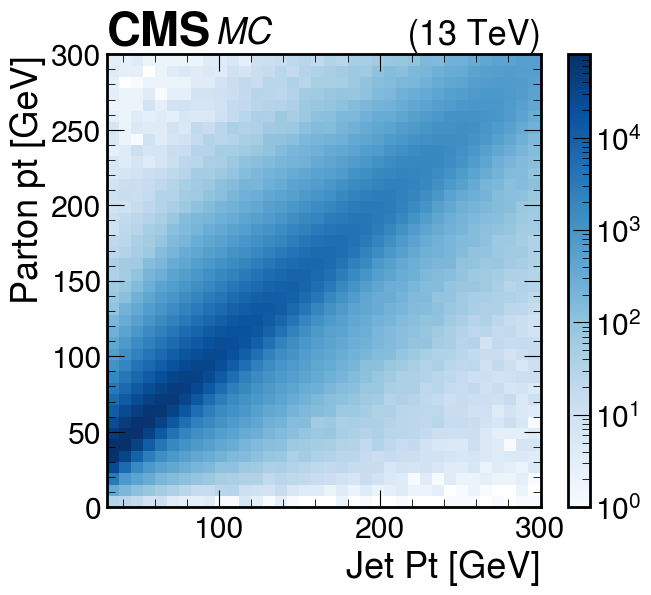

In [20]:
totH = output1["hist_ptComparison_parton_matching"].to_hist()

h_tt = totH['ttHTobb', '4j', '2018',:,:,sum]
fig, ax = plt.subplots(figsize=(7, 6), dpi=100)
w, x, y = h_tt.to_numpy()
#w = np.ma.masked_array(w, w < 2)
mesh = ax.pcolormesh(x, y, w.T, cmap="Blues", norm=LogNorm())
ax.set_xlabel("Jet Pt [GeV]")
ax.set_xlim(30,300)

ax.set_ylabel("Parton pt [GeV]")
hep.cms.label(llabel="MC",  loc=0, ax=ax)
fig.colorbar(mesh)

plt.show()

### by Eta and pt bins

In [21]:
eta_bins = totH.axes["jet_eta"].edges
eta_bins

array([-2.4 , -1.44, -0.48,  0.48,  1.44,  2.4 ])

In [22]:
jet_pt_bins = [35, 60, 100, 150,250]

In [25]:
totH1 = output1["hist_ptComparison_parton_matching"].to_hist()
totH2 = output2["hist_ptComparison_parton_matching"].to_hist()

sigH1 = totH['ttHTobb', '4j', '2018',:,:,:]
bkgH1 = totH['TTToSemiLeptonic', '4j', '2018',:,:,:]
sigH2 = totH['ttHTobb', '4j', '2018',:,:,:]
bkgH2 = totH['TTToSemiLeptonic', '4j', '2018',:,:,:]

/work/dvalsecc/miniconda3/envs/coffea3/lib/python3.10/site-packages/hist/basehist.py:110: UserWarning: sample is a protected keyword and cannot be used as axis name
  warnings.warn(disallowed_warning)


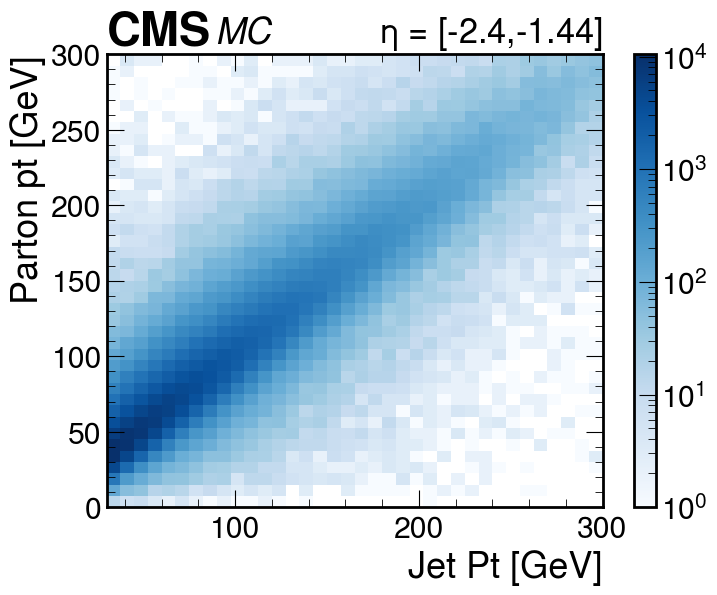

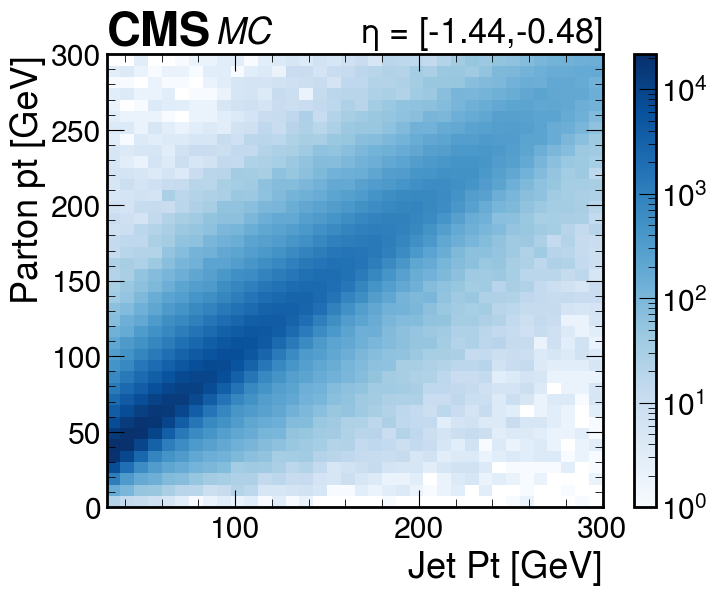

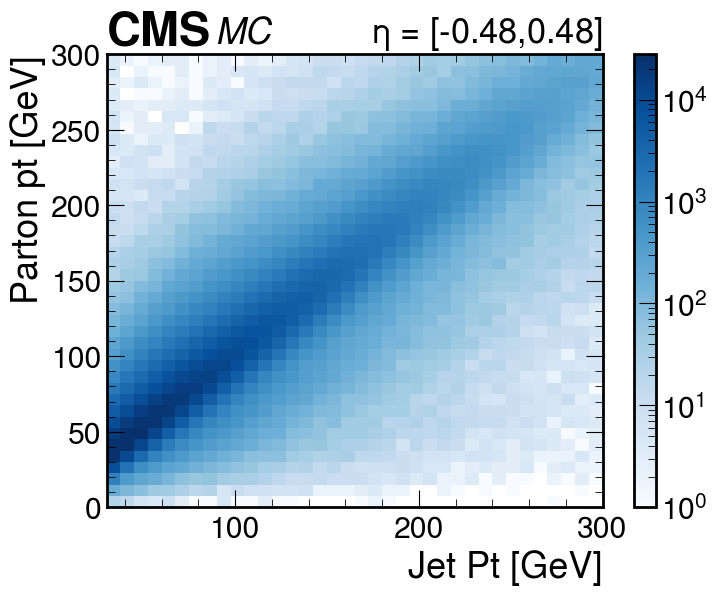

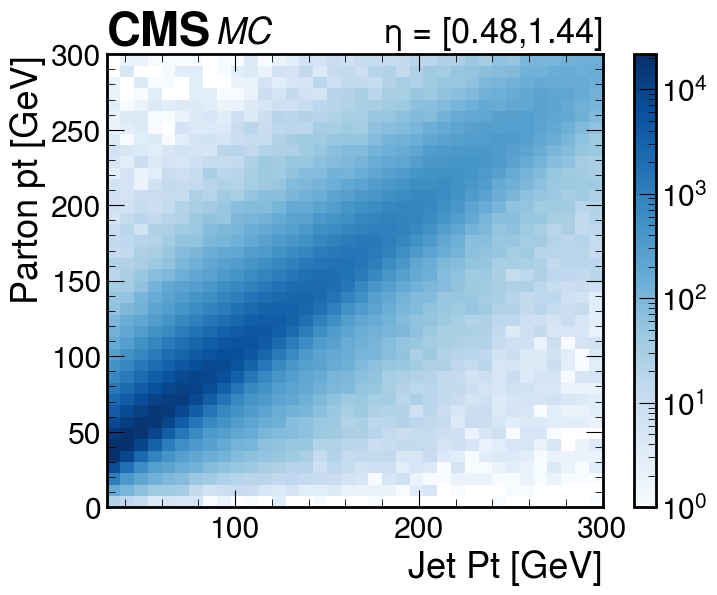

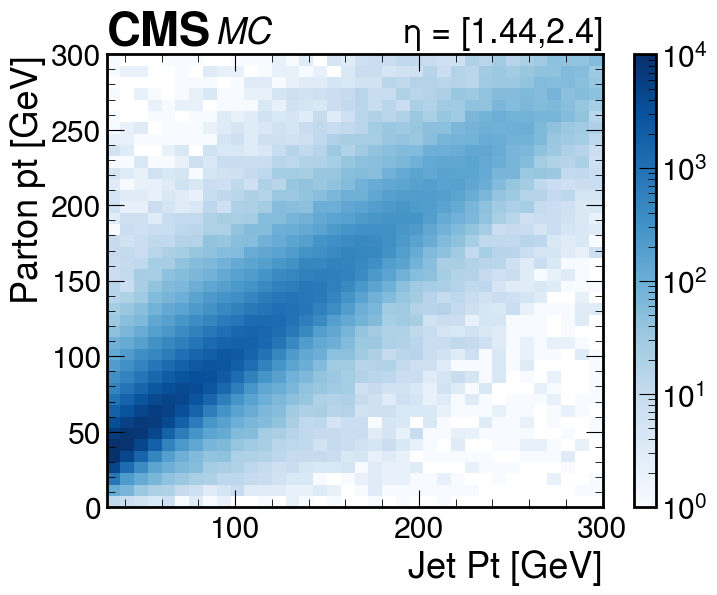

In [49]:
for i in range(5):
    H = sigH[{'jet_eta':i}]
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    w, x, y = H.to_numpy()
    #w = np.ma.masked_array(w, w < 2)
    mesh = ax.pcolormesh(x, y, w.T, cmap="Blues", norm=LogNorm())
    ax.set_xlabel("Jet Pt [GeV]")
    ax.set_xlim(30,300)

    ax.set_ylabel("Parton pt [GeV]")
    hep.cms.label(rlabel=f"$\eta$ = [{eta_bins[i]},{eta_bins[i+1]}]",llabel="MC",  loc=0, ax=ax)
    fig.colorbar(mesh)
    
    plt.show()

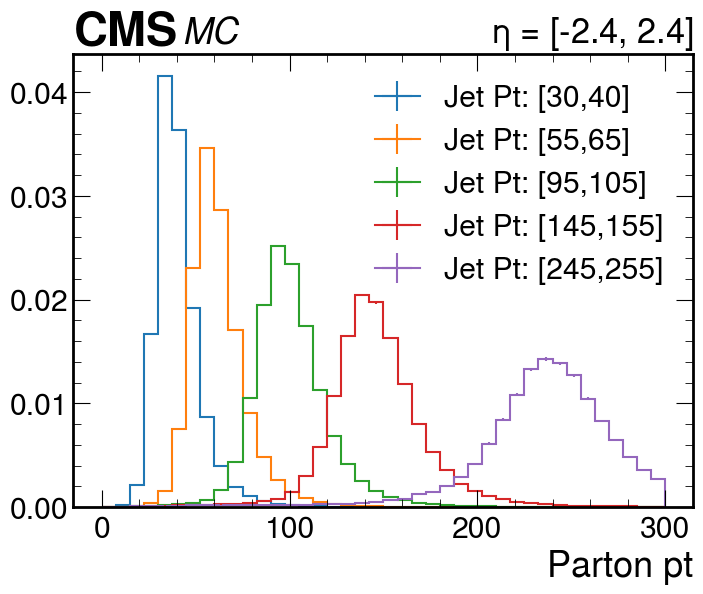

In [27]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
for j in range(len(jet_pt_bins)):
    jmin = bkgH1.axes["jet_pt"].index(jet_pt_bins[j]-5)
    jmax = bkgH1.axes["jet_pt"].index(jet_pt_bins[j]+5)
    P = bkgH1[jmin:jmax:sum, :, sum]
    #print(P)
    hep.histplot(P, ax=ax, label=f"Jet Pt: [{jet_pt_bins[j]-5},{jet_pt_bins[j]+5}]", density=True)

hep.cms.label(rlabel=f"$\eta$ = [-2.4, 2.4]",llabel="MC",  loc=0, ax=ax)
plt.legend()
plt.show()

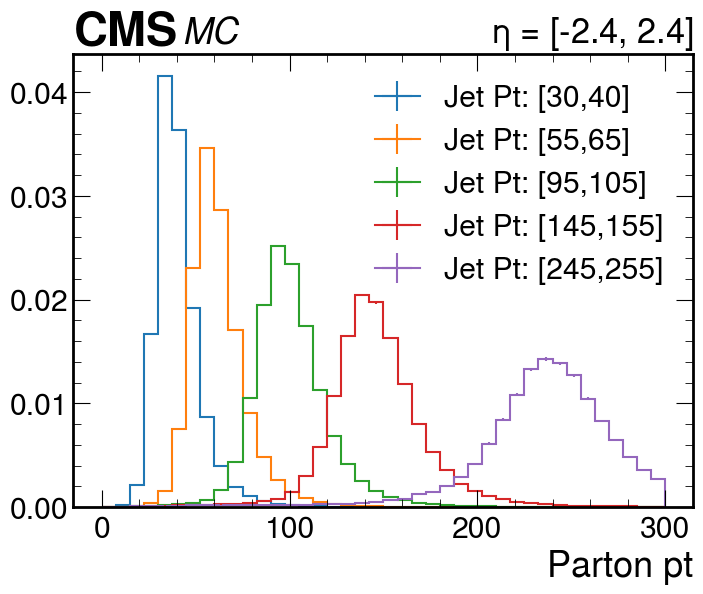

In [28]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
for j in range(len(jet_pt_bins)):
    jmin = bkgH2.axes["jet_pt"].index(jet_pt_bins[j]-5)
    jmax = bkgH2.axes["jet_pt"].index(jet_pt_bins[j]+5)
    P = bkgH2[jmin:jmax:sum, :, sum]
    #print(P)
    hep.histplot(P, ax=ax, label=f"Jet Pt: [{jet_pt_bins[j]-5},{jet_pt_bins[j]+5}]", density=True)

hep.cms.label(rlabel=f"$\eta$ = [-2.4, 2.4]",llabel="MC",  loc=0, ax=ax)
plt.legend()
plt.show()

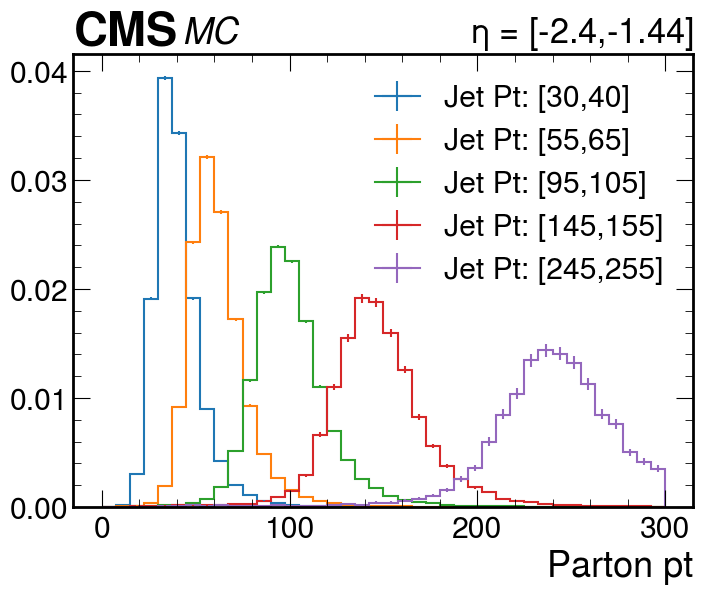

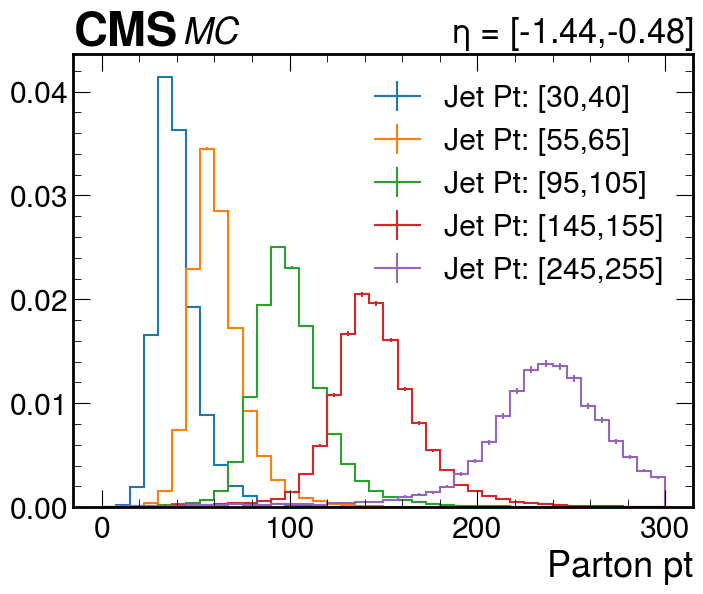

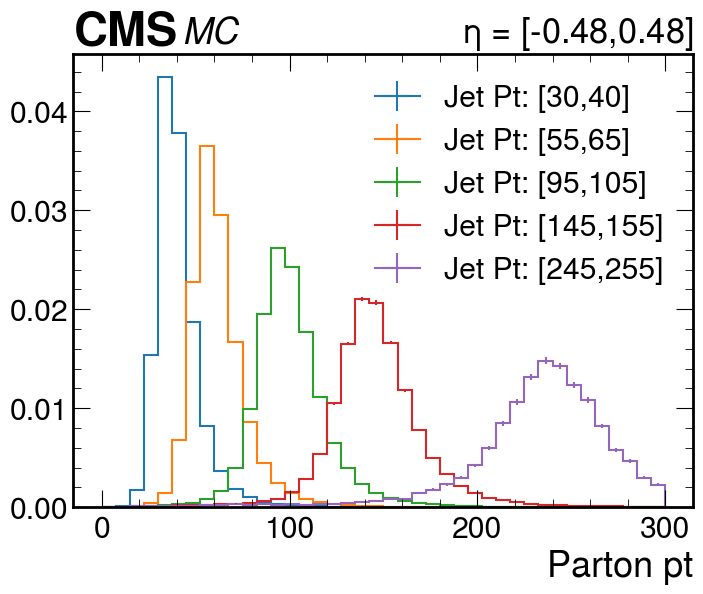

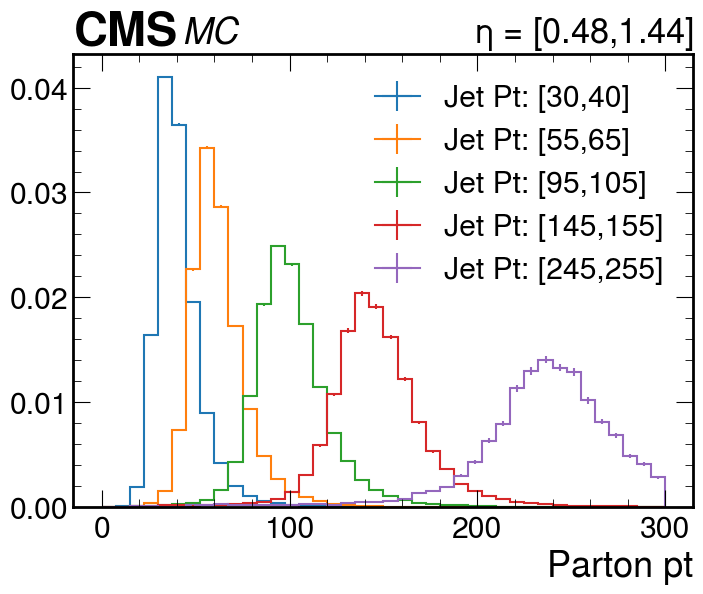

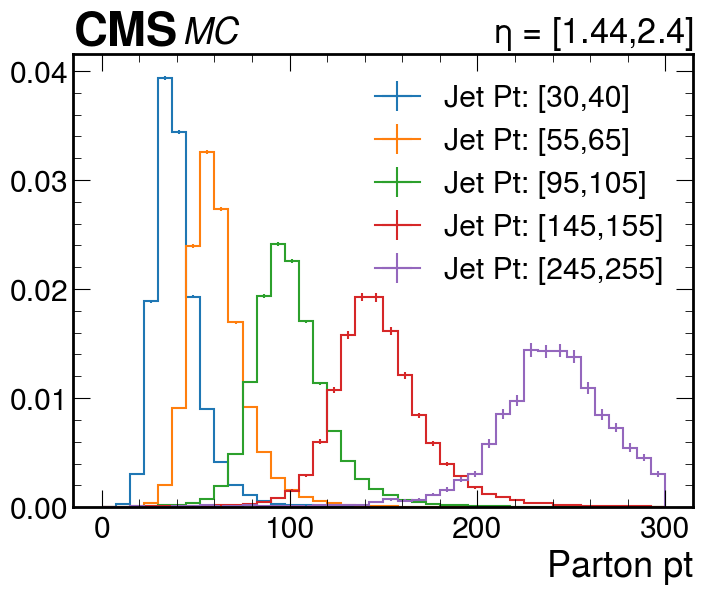

In [29]:
for i in range(len(eta_bins)-1):
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    for j in range(len(jet_pt_bins)):
        H = bkgH1[{'jet_eta':i}]
        jmin = bkgH1.axes["jet_pt"].index(jet_pt_bins[j]-5)
        jmax = bkgH1.axes["jet_pt"].index(jet_pt_bins[j]+5)
        P = H[jmin:jmax:sum, :]
        #print(P)
        hep.histplot(P, ax=ax, label=f"Jet Pt: [{jet_pt_bins[j]-5},{jet_pt_bins[j]+5}]", density=True)
        
    hep.cms.label(rlabel=f"$\eta$ = [{eta_bins[i]},{eta_bins[i+1]}]",llabel="MC",  loc=0, ax=ax)
    plt.legend()
    plt.show()

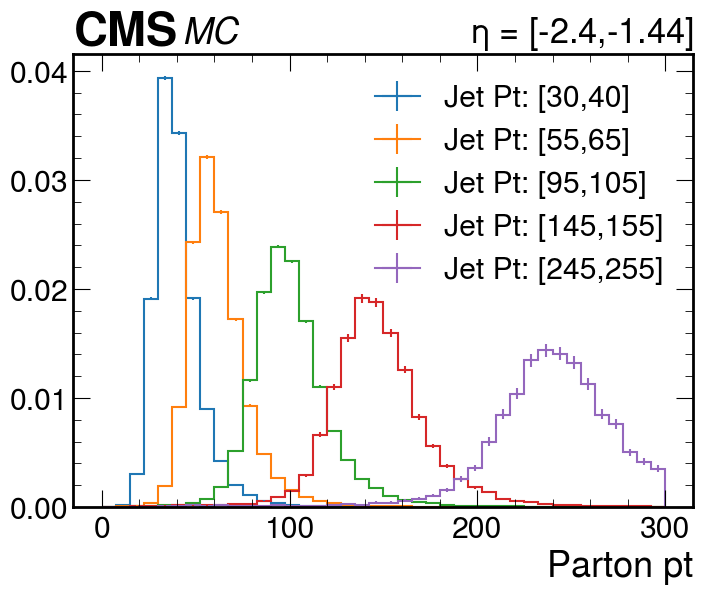

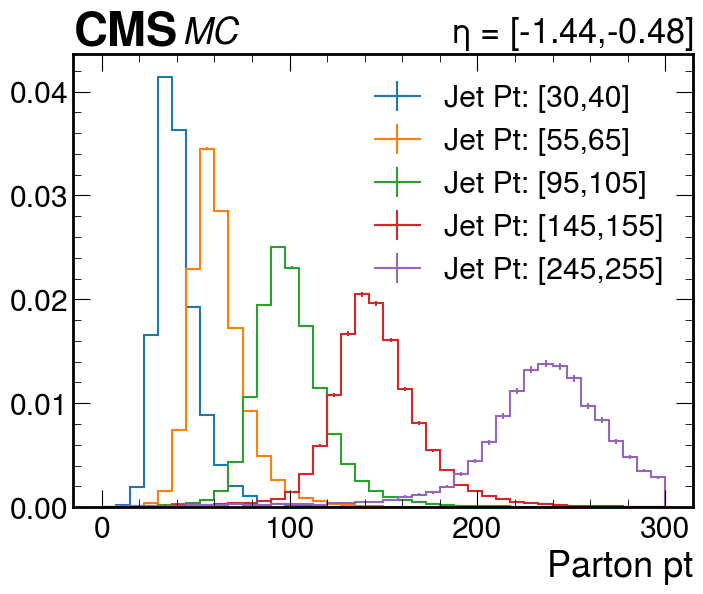

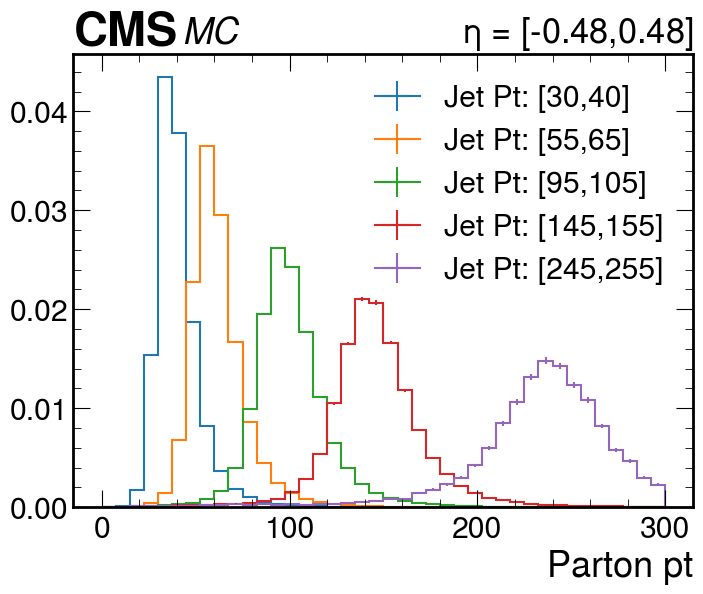

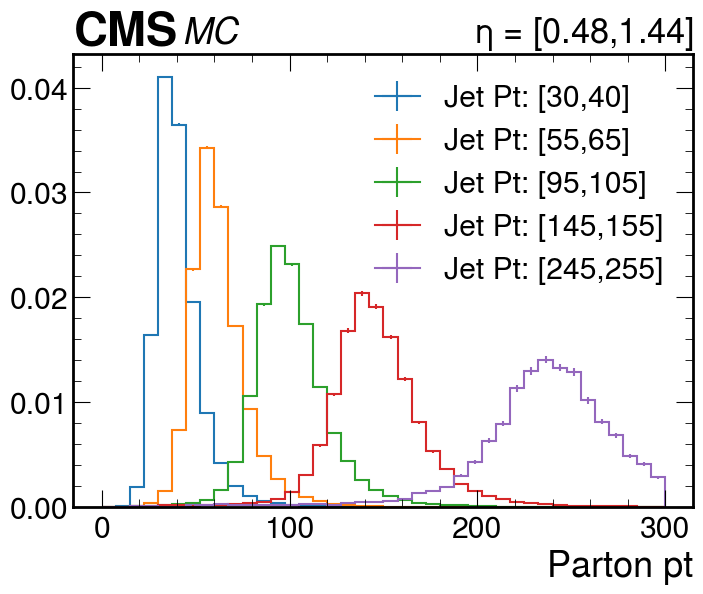

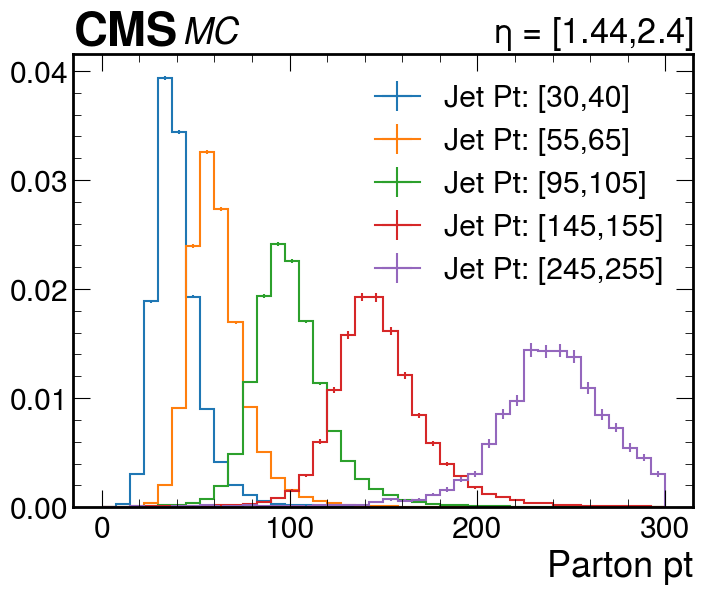

In [30]:
for i in range(len(eta_bins)-1):
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    for j in range(len(jet_pt_bins)):
        H = bkgH2[{'jet_eta':i}]
        jmin = bkgH2.axes["jet_pt"].index(jet_pt_bins[j]-5)
        jmax = bkgH2.axes["jet_pt"].index(jet_pt_bins[j]+5)
        P = H[jmin:jmax:sum, :]
        #print(P)
        hep.histplot(P, ax=ax, label=f"Jet Pt: [{jet_pt_bins[j]-5},{jet_pt_bins[j]+5}]", density=True)
        
    hep.cms.label(rlabel=f"$\eta$ = [{eta_bins[i]},{eta_bins[i+1]}]",llabel="MC",  loc=0, ax=ax)
    plt.legend()
    plt.show()

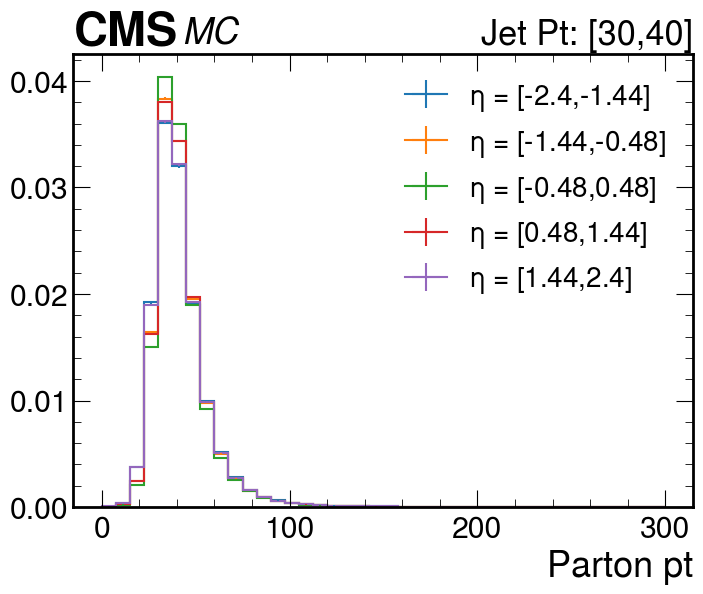

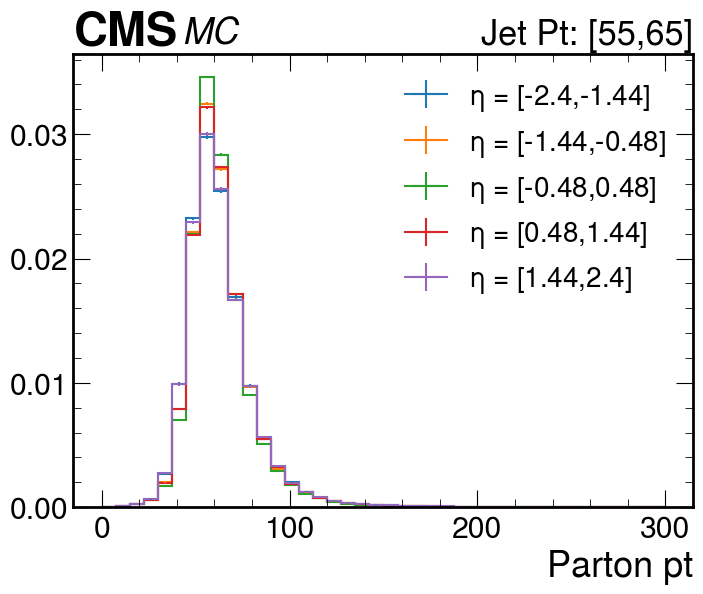

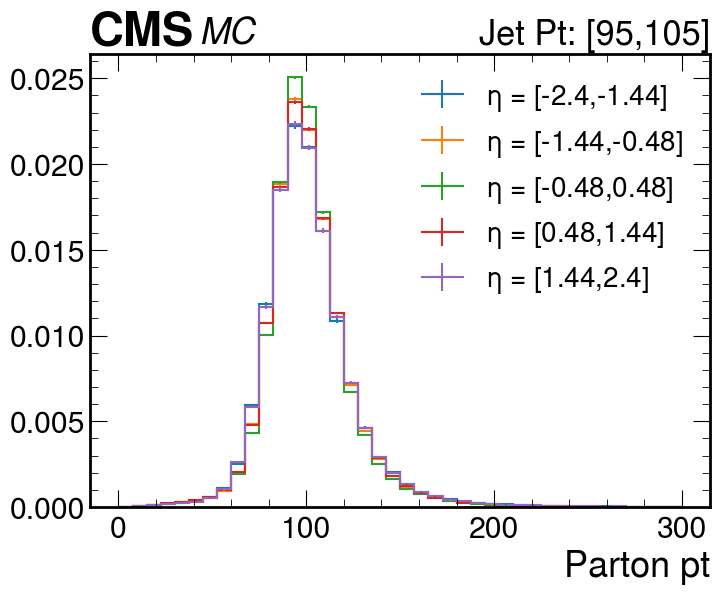

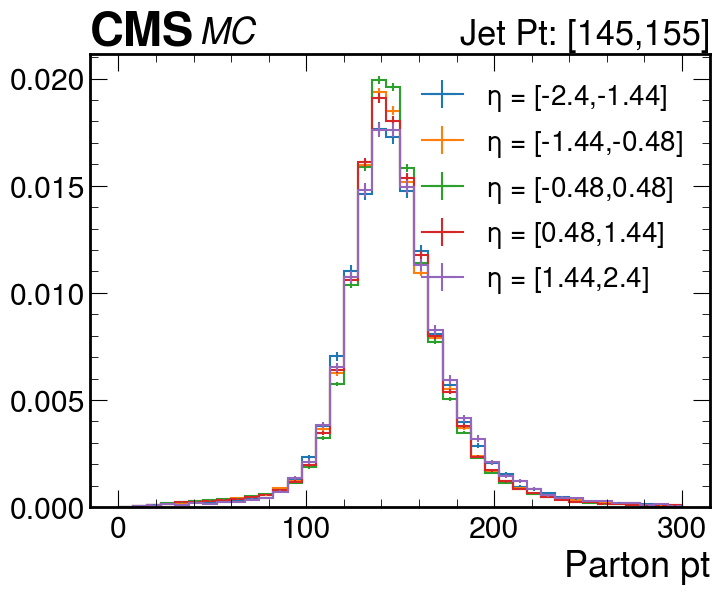

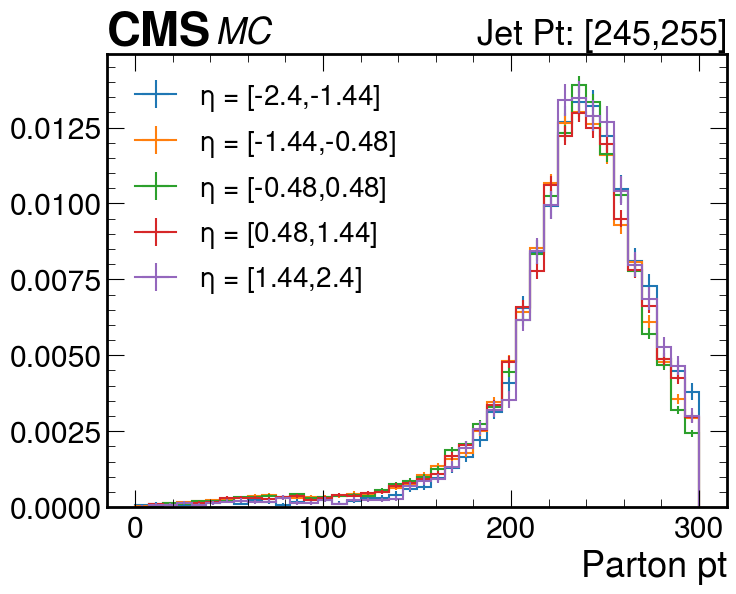

In [71]:
for j in range(len(jet_pt_bins)):
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    for i in range(len(eta_bins)-1):
        H = bkgH[{'jet_eta':i}]
        jmin = H.axes["jet_pt"].index(jet_pt_bins[j]-5)
        jmax = H.axes["jet_pt"].index(jet_pt_bins[j]+5)
        P = H[jmin:jmax:sum, :]
        #print(P)
        hep.histplot(P, ax=ax, label=f"$\eta$ = [{eta_bins[i]},{eta_bins[i+1]}]", density=True)
        
    hep.cms.label(rlabel=f"Jet Pt: [{jet_pt_bins[j]-5},{jet_pt_bins[j]+5}]",llabel="MC",  loc=0, ax=ax)
    plt.legend(fontsize=20)
    #plt.yscale('log')
    plt.show()

# Parton-jet ntuples

In [31]:
output2['columns']

{'4j': {'parton_pt': {'ttHTobb': column_accumulator(masked_array(data=[99.1328125, 75.30078125, 79.75, ..., 63.5, 99.75,
                      50.271484375],
                mask=[False, False, False, ..., False, False, False],
          fill_value=1e+20,
               dtype=float32)),
   'TTToSemiLeptonic': column_accumulator(masked_array(data=[138.1875, 83.18359375, 58.662109375, ..., 55.38671875,
                      39.86328125, 33.611328125],
                mask=[False, False, False, ..., False, False, False],
          fill_value=1e+20,
               dtype=float32))},
  'parton_pdgId': {'ttHTobb': column_accumulator(masked_array(data=[2, 5, -5, ..., 21, 5, -3],
                mask=[False, False, False, ..., False, False, False],
          fill_value=999999,
               dtype=int32)),
   'TTToSemiLeptonic': column_accumulator(masked_array(data=[21, -5, 5, ..., -5, 21, 1],
                mask=[False, False, False, ..., False, False, False],
          fill_value=999999,
   

In [32]:
parton_pt = output2['columns']['4j']['parton_pt']
jet_pt = output2['columns']['4j']['jet_pt']

Text(0.1, 0.9, 'TTToSemiLeptonic')

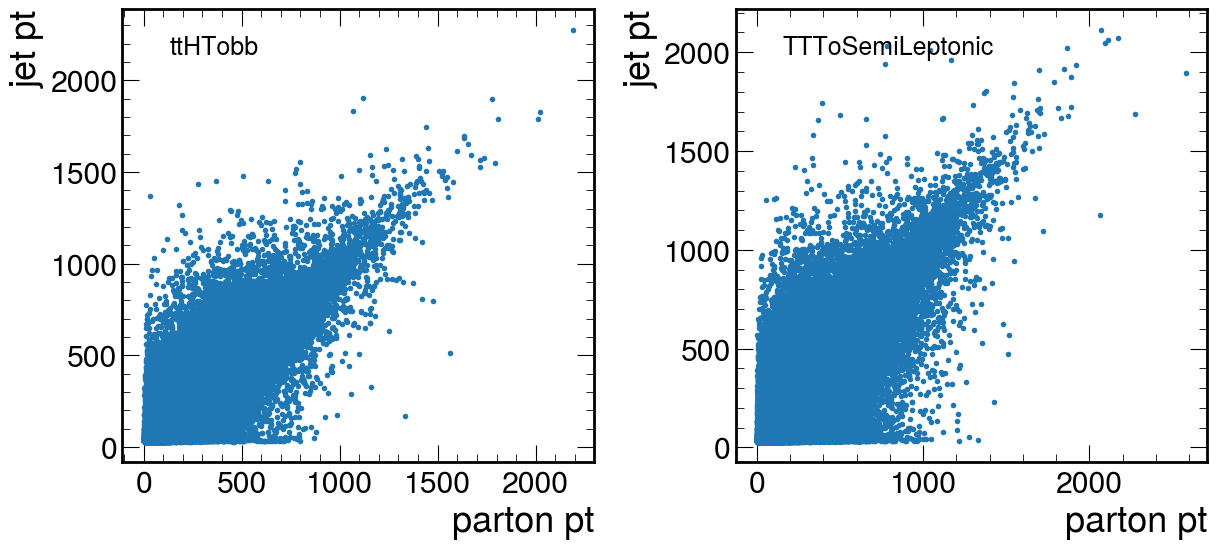

In [33]:
fig,( ax,ay) = plt.subplots(1, 2, figsize=(14, 6), dpi=100)
plt.subplots_adjust(wspace=0.3)

ax.scatter(parton_pt['ttHTobb'].value, jet_pt['ttHTobb'].value, marker='.')
ay.scatter(parton_pt['TTToSemiLeptonic'].value, jet_pt['TTToSemiLeptonic'].value, marker='.')
ax.set_xlabel("parton pt")
ax.set_ylabel("jet pt")
ay.set_xlabel("parton pt")
ay.set_ylabel("jet pt")

ax.text(0.1, 0.9, "ttHTobb", transform=ax.transAxes, fontsize=18)
ay.text(0.1, 0.9, "TTToSemiLeptonic", transform=ay.transAxes, fontsize=18)

Creating pandas dataframes

In [36]:
df_sig = pd.DataFrame({k: v['ttHTobb'].value for k, v in output2["columns"]['4j'].items()  if k != "njet_matched"})
df_tt = pd.DataFrame({k: v['TTToSemiLeptonic'].value for k, v in output2["columns"]['4j'].items()  if k != "njet_matched"})

In [37]:
df_sig

,parton_pt,parton_pdgId,jet_pt,jet_eta,parton_jet_dR,jet_btag
0,99.132812,2,95.81250,-0.340088,0.020497,0.001925
1,75.300781,5,87.31250,-1.776123,0.122728,0.915527
2,79.750000,-5,63.21875,-0.358459,0.062308,0.930176
3,77.425781,-5,53.53125,1.083740,0.107020,0.995605
4,78.609375,-5,68.31250,0.852661,0.195373,0.995117
...,...,...,...,...,...,...
3745441,92.531250,-5,118.18750,-1.287109,0.092728,0.999023
3745442,82.480469,5,89.25000,-0.973389,0.023477,0.999512
3745443,63.500000,21,74.93750,0.656616,0.110817,0.011475
3745444,99.750000,5,71.81250,-2.118652,0.017339,0.994629


In [51]:
df_tt.parton_pdgId.unique()

array([21, -5,  5,  4, -3, -4,  3, -2,  2,  1, -1], dtype=int32)

Text(0.1, 0.9, 'TTToSemiLeptonic')

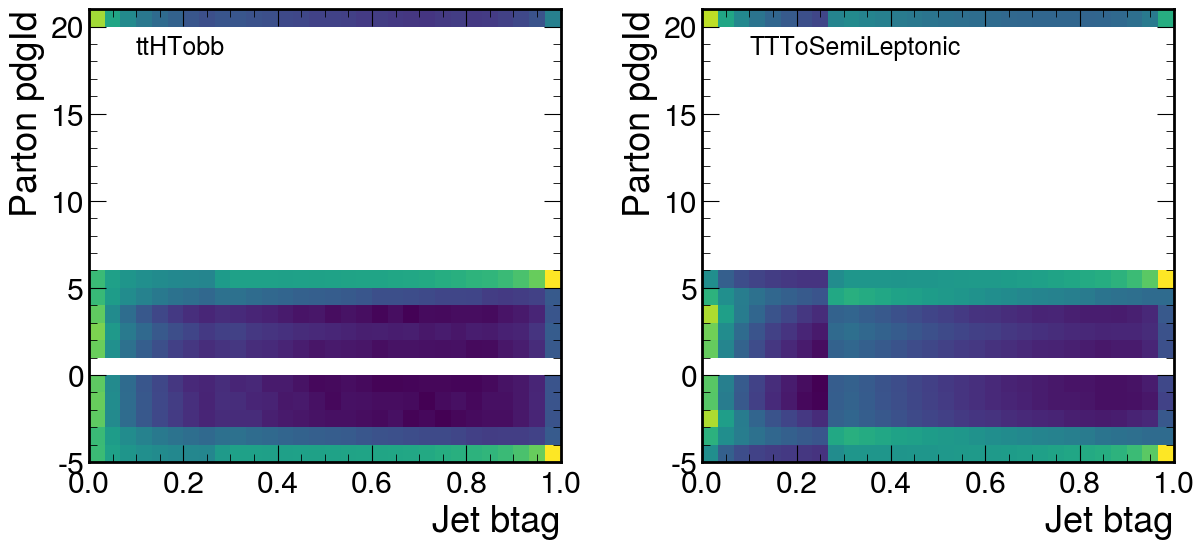

In [38]:
fig,( ax,ay) = plt.subplots(1, 2, figsize=(14, 6), dpi=100)
plt.subplots_adjust(wspace=0.3)

ax.hist2d(df_sig.jet_btag, df_sig.parton_pdgId, bins=(30,26), range=((0,1),(-5,21)), norm=LogNorm())
ax.set_xlabel("Jet btag")
ax.set_ylabel("Parton pdgId")

ay.hist2d(df_tt.jet_btag, df_tt.parton_pdgId, bins=(30,26), range=((0,1),(-5,21)), norm=LogNorm())
ay.set_xlabel("Jet btag")
ay.set_ylabel("Parton pdgId")

ax.text(0.1, 0.9, "ttHTobb", transform=ax.transAxes, fontsize=18)
ay.text(0.1, 0.9, "TTToSemiLeptonic", transform=ay.transAxes, fontsize=18)

### Transfer function dependecy on the pdgId

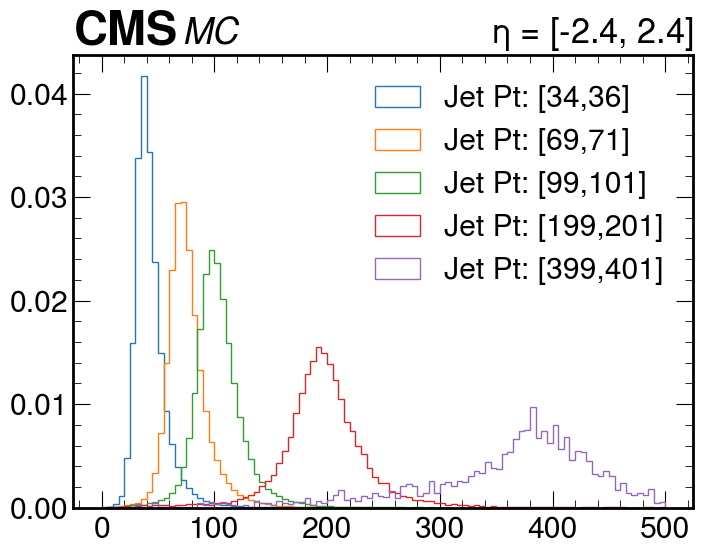

In [49]:
jet_pts = [35, 70, 100, 200, 400]
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
for j in range(len(jet_pts)):
    jmin = jet_pts[j]-1
    jmax = jet_pts[j]+1
    mask = (df_tt.jet_pt <= jmax ) & (df_tt.jet_pt >= jmin)
    ax.hist(df_tt[mask].parton_pt, bins=100, range=(0, 500), label=f"Jet Pt: [{jmin},{jmax}]", density=True, histtype="step")

hep.cms.label(rlabel=f"$\eta$ = [-2.4, 2.4]",llabel="MC",  loc=0, ax=ax)
plt.legend()
plt.show()

Text(1, 0, 'Parton $p_T$')

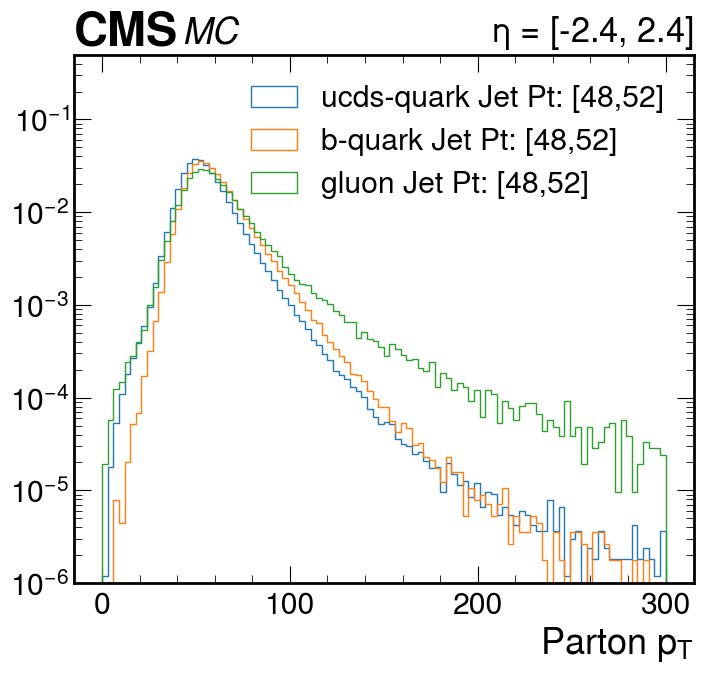

In [72]:
fig, ax = plt.subplots(figsize=(8, 7), dpi=100)

jmin = 48
jmax = 52
mask = (df_tt.jet_pt <= jmax ) & (df_tt.jet_pt >= jmin)
ax.hist(df_tt[mask & (df_tt.parton_pdgId <= 4)].parton_pt, bins=100, range=(0, 300), label=f"ucds-quark Jet Pt: [{jmin},{jmax}]", density=True, histtype="step",)
ax.hist(df_tt[mask & (df_tt.parton_pdgId.abs() == 5)].parton_pt, bins=100, range=(0, 300), label=f"b-quark Jet Pt: [{jmin},{jmax}]", density=True, histtype="step")
ax.hist(df_tt[mask & (df_tt.parton_pdgId.abs() == 21)].parton_pt, bins=100, range=(0, 300), label=f"gluon Jet Pt: [{jmin},{jmax}]", density=True, histtype="step")

hep.cms.label(rlabel=f"$\eta$ = [-2.4, 2.4]",llabel="MC",  loc=0, ax=ax)
plt.legend()
ax.set_ylim(1e-6, 0.5)
ax.set_yscale("log")
ax.set_xlabel("Parton $p_T$")


Text(1, 0, 'Parton $p_T$')

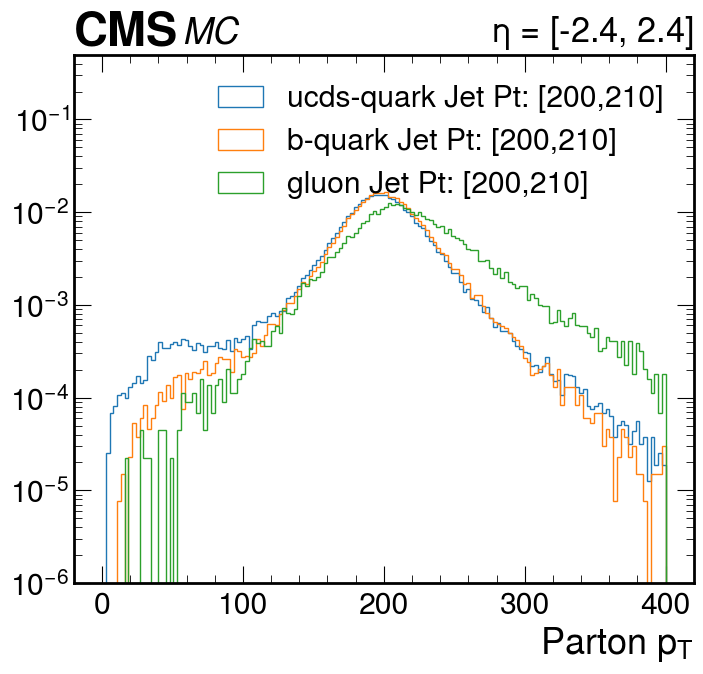

In [83]:
fig, ax = plt.subplots(figsize=(8, 7), dpi=100)

jmin = 200
jmax = 210
mask = (df_tt.jet_pt <= jmax ) & (df_tt.jet_pt >= jmin)
ax.hist(df_tt[mask & (df_tt.parton_pdgId <= 4)].parton_pt, bins=150, range=(0, 400), label=f"ucds-quark Jet Pt: [{jmin},{jmax}]", density=True, histtype="step",)
ax.hist(df_tt[mask & (df_tt.parton_pdgId.abs() == 5)].parton_pt, bins=150, range=(0, 400), label=f"b-quark Jet Pt: [{jmin},{jmax}]", density=True, histtype="step")
ax.hist(df_tt[mask & (df_tt.parton_pdgId.abs() == 21)].parton_pt, bins=150, range=(0, 400), label=f"gluon Jet Pt: [{jmin},{jmax}]", density=True, histtype="step")

hep.cms.label(rlabel=f"$\eta$ = [-2.4, 2.4]",llabel="MC",  loc=0, ax=ax)
plt.legend()
ax.set_ylim(1e-6, 0.5)
ax.set_yscale("log")
ax.set_xlabel("Parton $p_T$")
